In [1]:
from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount)<1: drive.mount('/content/drive')


In [2]:
!nvidia-smi

Thu Dec 10 04:12:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import os.path
from os.path import join,split
from tensorflow.keras.utils import get_file

def cp_file( url ,
    base_path="/content/drive/MyDrive/Lec_Capture/_data/yolo",
    target_path="/content/"
    ):
  head, fileName = os.path.split(url)
  filePath = join(base_path, fileName)
  get_file(filePath, url)
  target_path="/content/"
  ![ ! -f {target_path} ]&&cp {filePath} {target_path}
  return join(target_path,fileName)

def show_image(file):
  fig,ax = plt.subplots()
  ax.tick_params(labelbottom="off",bottom="off")
  ax.tick_params(labelleft="off",left="off")
  ax.set_xticklabels([]) 
  ax.axis('off')

  if os.path.exists(file):
    img = cv2.imread(file)
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(show_img)



In [4]:
    
!git clone https://github.com/Finfra/darknet.git
os.chdir("/content/darknet/")
!ls

fatal: destination path 'darknet' already exists and is not an empty directory.
3rdparty   CMakeLists.txt	   image_yolov4.sh	  predictions.jpg
backup	   darknet		   include		  README.md
bad.list   DarknetConfig.cmake.in  json_mjpeg_streams.sh  results
build	   darknet_images.py	   LICENSE		  scripts
build.ps1  darknet.py		   Makefile		  src
build.sh   darknet_video.py	   net_cam_v3.sh	  video_yolov3.sh
cfg	   data			   net_cam_v4.sh	  video_yolov4.sh
cmake	   image_yolov3.sh	   obj


In [5]:
!apt install libopencv-dev python-opencv ffmpeg
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
# !sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
python-opencv is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [6]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...this statement, but the latter is misleadingly

In [7]:
weight_path=cp_file(url = "http://pjreddie.com/media/files/yolov1/yolov1.weights")
cfg="/content/darknet/cfg/yolov1.cfg"
input_file="/content/darknet/data/dog.jpg"
!./darknet yolo test {cfg} {weight_path} {input_file}

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     64       7 x 7/ 2    448 x 448 x   3 ->  224 x 224 x  64 0.944 BF
   1 max                2x 2/ 2    224 x 224 x  64 ->  112 x 112 x  64 0.003 BF
   2 conv    192       3 x 3/ 1    112 x 112 x  64 ->  112 x 112 x 192 2.775 BF
   3 max                2x 2/ 2    112 x 112 x 192 ->   56 x  56 x 192 0.002 BF
   4 conv    128       1 x 1/ 1     56 x  56 x 192 ->   56 x  56 x 128 0.154 BF
   5 conv    256       3 x 3/ 1     56 x  56 x 128 ->   56 x  56 x 256 1.850 BF
   6 conv    256       1 x 1/ 1     56 x  56 x 256 ->   56 x  56 x 256 0.411 BF
   7 conv    512       3 x 3/ 1     56 x  56 x 256 ->   56 x  56 x 512 7.399 BF
   8 max                2x 2/ 2     56 x  56 x 512 ->   28 x  28 x 512

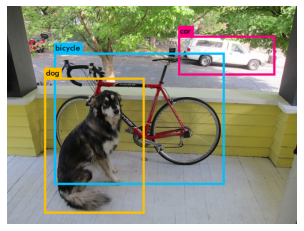

In [8]:
show_image('/content/darknet/predictions.jpg')

In [27]:
cfg="/content/darknet/cfg/yolov1.cfg"
input_file="/content/darknet/data/kite.jpg"
!./darknet yolo test {cfg} {weight_path} {input_file}


 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     64       7 x 7/ 2    448 x 448 x   3 ->  224 x 224 x  64 0.944 BF
   1 max                2x 2/ 2    224 x 224 x  64 ->  112 x 112 x  64 0.003 BF
   2 conv    192       3 x 3/ 1    112 x 112 x  64 ->  112 x 112 x 192 2.775 BF
   3 max                2x 2/ 2    112 x 112 x 192 ->   56 x  56 x 192 0.002 BF
   4 conv    128       1 x 1/ 1     56 x  56 x 192 ->   56 x  56 x 128 0.154 BF
   5 conv    256       3 x 3/ 1     56 x  56 x 128 ->   56 x  56 x 256 1.850 BF
   6 conv    256       1 x 1/ 1     56 x  56 x 256 ->   56 x  56 x 256 0.411 BF
   7 conv    512       3 x 3/ 1     56 x  56 x 256 ->   56 x  56 x 512 7.399 BF
   8 max                2x 2/ 2     56 x  56 x 512 ->   28 x  28 x 512

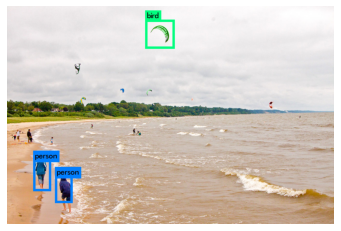

In [28]:
show_image('/content/darknet/predictions.jpg')

In [29]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/yolov1.weights /content/darknet/data/person.jpg

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     64       7 x 7/ 2    448 x 448 x   3 ->  224 x 224 x  64 0.944 BF
   1 max                2x 2/ 2    224 x 224 x  64 ->  112 x 112 x  64 0.003 BF
   2 conv    192       3 x 3/ 1    112 x 112 x  64 ->  112 x 112 x 192 2.775 BF
   3 max                2x 2/ 2    112 x 112 x 192 ->   56 x  56 x 192 0.002 BF
   4 conv    128       1 x 1/ 1     56 x  56 x 192 ->   56 x  56 x 128 0.154 BF
   5 conv    256       3 x 3/ 1     56 x  56 x 128 ->   56 x  56 x 256 1.850 BF
   6 conv    256       1 x 1/ 1     56 x  56 x 256 ->   56 x  56 x 256 0.411 BF
   7 conv    512       3 x 3/ 1     56 x  56 x 256 ->   56 x  56 x 512 7.399 BF
   8 max                2x 2/ 2     56 x  56 x 512 ->   28 x  28 x 512

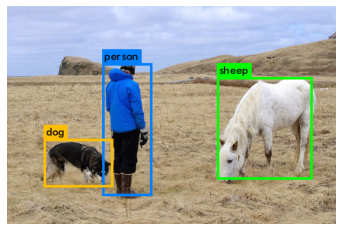

In [30]:
show_image('/content/darknet/predictions.jpg')

In [31]:
weight_path=cp_file(url = "http://pjreddie.com/media/files/yolov1/tiny-yolov1.weights")
!./darknet yolo test {cfg} {weight_path} {input_file}

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     64       7 x 7/ 2    448 x 448 x   3 ->  224 x 224 x  64 0.944 BF
   1 max                2x 2/ 2    224 x 224 x  64 ->  112 x 112 x  64 0.003 BF
   2 conv    192       3 x 3/ 1    112 x 112 x  64 ->  112 x 112 x 192 2.775 BF
   3 max                2x 2/ 2    112 x 112 x 192 ->   56 x  56 x 192 0.002 BF
   4 conv    128       1 x 1/ 1     56 x  56 x 192 ->   56 x  56 x 128 0.154 BF
   5 conv    256       3 x 3/ 1     56 x  56 x 128 ->   56 x  56 x 256 1.850 BF
   6 conv    256       1 x 1/ 1     56 x  56 x 256 ->   56 x  56 x 256 0.411 BF
   7 conv    512       3 x 3/ 1     56 x  56 x 256 ->   56 x  56 x 512 7.399 BF
   8 max                2x 2/ 2     56 x  56 x 512 ->   28 x  28 x 512

In [32]:
!./darknet yolo test /content/darknet/cfg/yolov1-tiny.cfg /content/tiny-yolov1.weights /content/darknet/data/person.jpg


 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    448 x 448 x   3 ->  448 x 448 x  16 0.173 BF
   1 max                2x 2/ 2    448 x 448 x  16 ->  224 x 224 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    224 x 224 x  16 ->  224 x 224 x  32 0.462 BF
   3 max                2x 2/ 2    224 x 224 x  32 ->  112 x 112 x  32 0.002 BF
   4 conv     64       3 x 3/ 1    112 x 112 x  32 ->  112 x 112 x  64 0.462 BF
   5 max                2x 2/ 2    112 x 112 x  64 ->   56 x  56 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     56 x  56 x  64 ->   56 x  56 x 128 0.462 BF
   7 max                2x 2/ 2     56 x  56 x 128 ->   28 x  28 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     28 x  28 x 128 ->   28 x  28 x 256

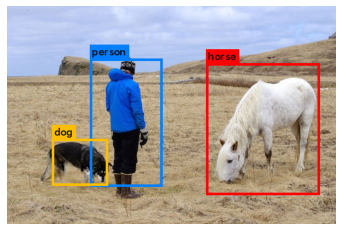

In [33]:
show_image('/content/darknet/predictions.jpg')

In [34]:
os.chdir("/content")
from google.colab import files

uploaded = files.upload()
file=[f for f in uploaded.keys()]
file=file[0]
folder=!pwd

path=join(folder[0],file)


Saving wizard.jpg to wizard (1).jpg


In [35]:
os.chdir("/content/darknet/")
!./darknet yolo test /content/darknet/cfg/yolov1-tiny.cfg /content/tiny-yolov1.weights {path}

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    448 x 448 x   3 ->  448 x 448 x  16 0.173 BF
   1 max                2x 2/ 2    448 x 448 x  16 ->  224 x 224 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    224 x 224 x  16 ->  224 x 224 x  32 0.462 BF
   3 max                2x 2/ 2    224 x 224 x  32 ->  112 x 112 x  32 0.002 BF
   4 conv     64       3 x 3/ 1    112 x 112 x  32 ->  112 x 112 x  64 0.462 BF
   5 max                2x 2/ 2    112 x 112 x  64 ->   56 x  56 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     56 x  56 x  64 ->   56 x  56 x 128 0.462 BF
   7 max                2x 2/ 2     56 x  56 x 128 ->   28 x  28 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     28 x  28 x 128 ->   28 x  28 x 256

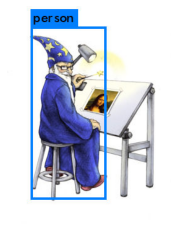

In [36]:
show_image('/content/darknet/predictions.jpg')